# This notebook is for course two : Data understanding and Preparation  
Please try to go through the code steps mentioned in the course and try to create the code on your own. Use this document as a reference incase you face problems in writing the code

# Importing Data files

In [ ]:
#Import Product DataSet here

In [ ]:
#Import Transaction DataSet Here

In [ ]:
#Import Customer Dataset Here

# Quick Data Exploration

In [4]:
product_data.shape

(30, 3)

In [5]:
transactions_data.shape

(10000, 6)

In [6]:
customer_data.shape

(500, 9)

###### We can conclude from the above that Retailer X sells 30 products and served 500 customers in a total of 10,000 recorded transactions. 

In [7]:
type(customer_data)

pandas.core.frame.DataFrame

In [8]:
type(customer_data.AGE)

pandas.core.series.Series

In [9]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [10]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [11]:
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married


In [12]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

In [13]:
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married


In [14]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

Now running the “dtypes” method reveals that data type conversion of INCOME was successful 

In [15]:
customer_data["MARITAL STATUS"].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [16]:
customer_data["INCOME"].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [22]:
customer_data["MARITAL STATUS"].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [20]:
from datetime import datetime
customer_data['ENROLLMENT DATE']=\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y') )

In [21]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

## Data Quality
Data used in this tutorial is mostly free from data quality issues, however in real life, data scientists deal with data sets that needs to be cleaned and corrected for their quality issues

In [23]:
print('null values for transactoins ?',transactions_data.isnull().values.any())
print('null values for products ?',product_data.isnull().values.any())
print('null values for customers ?',customer_data.isnull().values.any())

null values for transactoins ? False
null values for products ? False
null values for customers ? True


In [24]:
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

It turned out that ENROLMENT DATE is the only column which has null values. 
The reasons behind is that not all customers are enrolled to loyalty and hence there is no enrolment date

# Analysis of the distribution of variables using graphs 

In [25]:
import matplotlib.pyplot as plt


### Univariate Analysis (Single variable analysis)

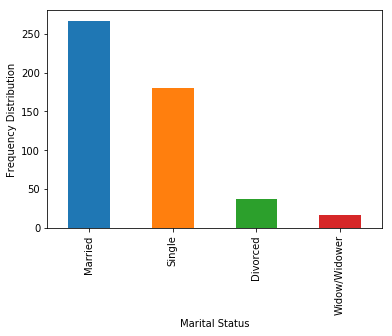

In [26]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Frequency Distribution")
plt.show()

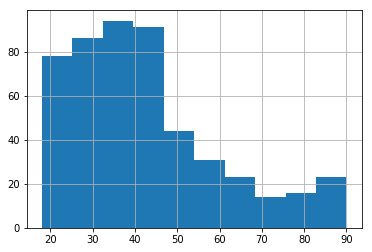

In [27]:
customer_data['AGE'].hist(bins=10)  
plt.show()

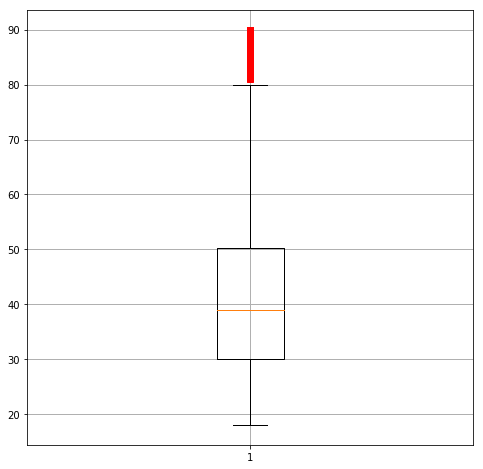

In [28]:
plt.figure(figsize=(8,8))
plt.boxplot(customer_data.AGE,0,'rs',1)
plt.grid(linestyle='-',linewidth=1)
plt.show()

In [29]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

### Constructing new features and generating Insights

Remember our business understanding objectives
1-Understanding the factors associated with loyalty program participation
2-Understanding the factors associated with increased spending


In [30]:
trans_products=transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [31]:
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [32]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [33]:
trans_products.dtypes

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
PRODUCT CODE            int64
PRODUCT CATEGORY       object
UNIT LIST PRICE       float64
dtype: object

In [34]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [35]:
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total_Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [36]:
Income_by_product = trans_products.groupby('PRODUCT CATEGORY').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

In [37]:
Income_by_product

,Total_Price
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In [38]:
Revenue_by_product=Income_by_product.rename(columns={'Total_Price':'Revenue Per Product'})

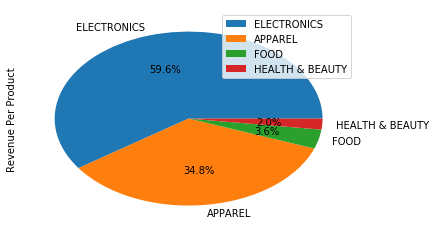

In [39]:
Revenue_by_product['Revenue Per Product'].plot(kind='pie',autopct='%1.1f%%',legend = True)

##### For each customer , we will calculate total spend ,total spend per category ,recent transaction date

In [40]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

In [41]:
customer_prod_categ.head()

Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [42]:
customer_prod_categ.columns

Index(['Total_Price'], dtype='object')

In [45]:
customer_prod_categ.reset_index().head()

,CUSTOMER NUM,PRODUCT CATEGORY,Total_Price
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [46]:
customer_prod_categ=customer_prod_categ.reset_index()

In [47]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [48]:
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [49]:
trans_products['TRANSACTION DATE']=trans_products['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

In [50]:
recent_trans_total_spend=trans_products.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE':'max','Total_Price':'sum'}). \
rename(columns={'TRANSACTION DATE':'RECENT TRANSACTION DATE','Total_Price':'TOTAL SPENT'})
recent_trans_total_spend.head()

,TOTAL SPENT,RECENT TRANSACTION DATE
CUSTOMER NUM,,
10001,6826.770,2015-12-24
10002,5062.451,2015-12-21
10003,8562.440,2015-12-31
10004,5522.694,2015-12-17
10005,213.512,2015-12-22


In [51]:
customer_KPIs=customer_pivot.merge(recent_trans_total_spend,how='inner',left_index=True, right_index=True )

In [52]:
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,RECENT TRANSACTION DATE
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770,2015-12-24
10002,2312.509,2473.163,276.779,NaN,5062.451,2015-12-21
10003,2887.382,5414.418,260.640,NaN,8562.440,2015-12-31
10004,3637.213,1840.211,45.270,NaN,5522.694,2015-12-17
10005,213.512,NaN,NaN,NaN,213.512,2015-12-22


In [53]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,RECENT TRANSACTION DATE
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770,2015-12-24
10002,2312.509,2473.163,276.779,0.000,5062.451,2015-12-21
10003,2887.382,5414.418,260.640,0.000,8562.440,2015-12-31
10004,3637.213,1840.211,45.270,0.000,5522.694,2015-12-17
10005,213.512,0.000,0.000,0.000,213.512,2015-12-22


In [54]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [56]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,RECENT TRANSACTION DATE
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,2015-12-24
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,5062.451,2015-12-21
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,8562.440,2015-12-31
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,5522.694,2015-12-17
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,213.512,2015-12-22


## Bivariate Analysis (2-variable analysis) – Loyalty as a target variable 

#### Gender

In [57]:
table=pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


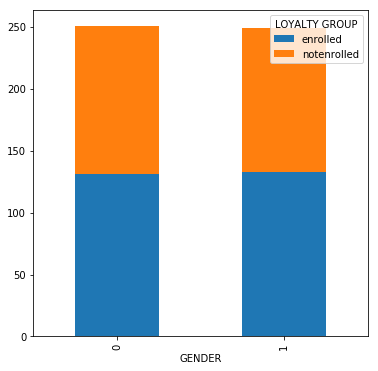

In [58]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

#### Experience Score

In [59]:
table=pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


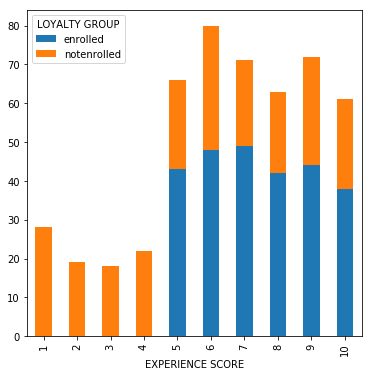

In [60]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

#### Marital Status

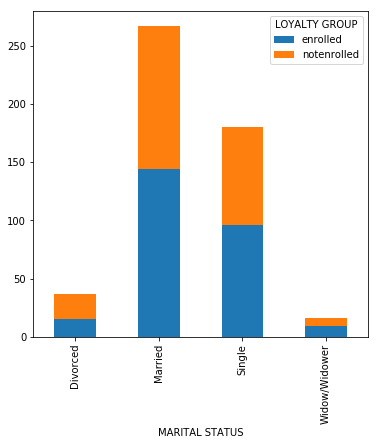

In [61]:
table=pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

#### Age

In [62]:
customer_all_view['AGE_BINNED'] = pd.cut(customer_all_view['AGE'],10) # 10 bins of age

In [63]:
customer_all_view['AGE_BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE_BINNED, dtype: int64

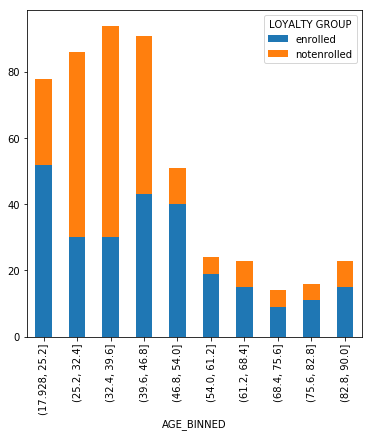

In [64]:
table=pd.crosstab(customer_all_view['AGE_BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

In [65]:
customer_all_view.groupby("LOYALTY GROUP").agg({'AGE':'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


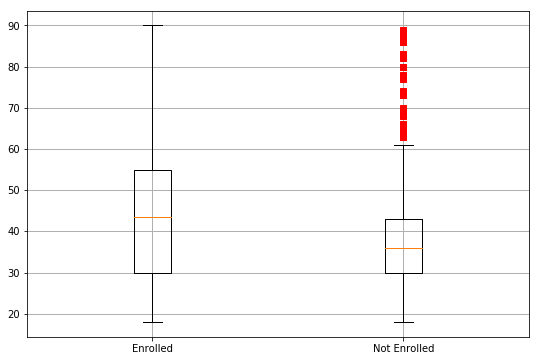

In [66]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "enrolled"]
plot2=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid( linestyle='-', linewidth=1)
plt.show()

#### Total Spend

In [67]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10) # 10 bins of age

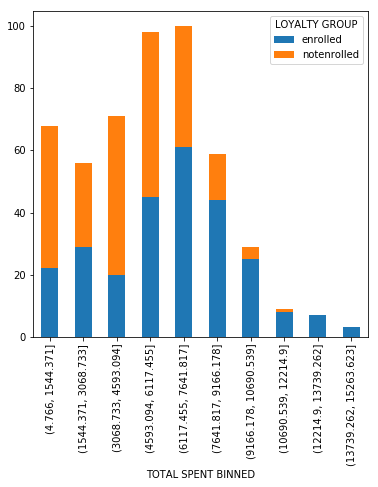

In [68]:
table=pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

## Bivariate Analysis (2-variable analysis) – Customer spend as a target variable 

#### Age

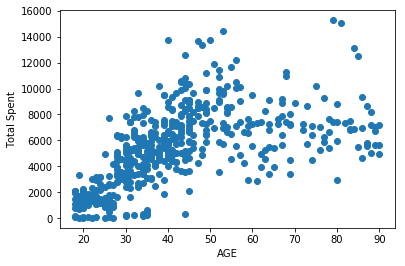

In [69]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel("AGE")
plt.ylabel("Total Spent")
plt.show()

In [70]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])

(0.57601706772592709, 1.5608217502782303e-45)

#### Income

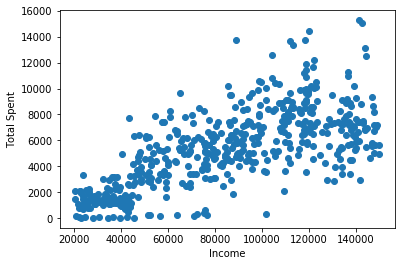

In [71]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

In [72]:
pearsonr(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])

(0.68803110846251181, 2.3226326963813968e-71)

#### Experience Score

In [73]:
table = customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

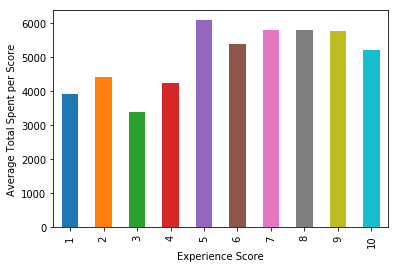

In [74]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()
